##**Binary classification model that can predict male/female from Bengali handwritten digits**

- **Dataset**
    - [Ekush](https://shahariarrabby.github.io/ekush/#download)
- **Train data set 90%**
-**Test data set 10%**

In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
from sklearn import  datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/1.4.1Dataset/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
maleDgt1 = pd.read_csv('/content/gdrive/MyDrive/1.4.1Dataset/maleDigits.csv').iloc[:,:-1]
femaleDgt1 = pd.read_csv('/content/gdrive/MyDrive/1.4.1Dataset/femaleDigits.csv').iloc[:,:-1]


In [ ]:
maleDgt1['lable'] = 0
femaleDgt1['lable'] = 1
total = pd.concat([maleDgt1,femaleDgt1])


In [ ]:
normalizeVale = np.float32(total.loc[:,total.columns != 'lable'].values/255) 
#normalizeVale

In [ ]:
labels = total.lable.values

0


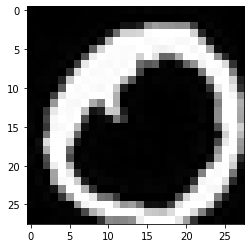

In [ ]:
show_img = (normalizeVale[0]).reshape(28,28)
plt.imshow(show_img,cmap='gray')

print(labels[0])

In [ ]:
maleDgt = pd.read_csv('/content/gdrive/MyDrive/1.4.1Dataset/maleDigits.csv')
maleDgt = np.array(maleDgt)
maleDgt

array([[  0,   2,   0, ...,   1,   1, 112],
       [  0,   0,   0, ...,   0,   0, 112],
       [  1,   0,   0, ...,   1,   2, 112],
       ...,
       [  0,   0,   0, ...,   1,   0, 121],
       [  0,   1,   1, ...,   0,   0, 121],
       [  2,   0,   1, ..., 186,  14, 121]])

In [ ]:
femaleDgt = pd.read_csv('/content/gdrive/MyDrive/1.4.1Dataset/femaleDigits.csv')
#female.head()
femaleDgt = np.array(femaleDgt)
femaleDgt

array([[  0,   0,   0, ...,   3,   1, 112],
       [  0,   0,   0, ...,   1,   1, 112],
       [  0,   0,   1, ...,   0,   0, 112],
       ...,
       [  0,   0,   0, ...,   0,   0, 121],
       [  1,   1,   1, ...,   0,   0, 121],
       [  1,   2,   0, ...,   1,   0, 121]])

In [ ]:
### male label 0

lvl = maleDgt.shape
maleDgt[:,(lvl[1]-1)] = 0
maleDgt

array([[  0,   2,   0, ...,   1,   1,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   1,   2,   0],
       ...,
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   1,   1, ...,   0,   0,   0],
       [  2,   0,   1, ..., 186,  14,   0]])

In [ ]:
### female label 1

lvl = femaleDgt.shape
femaleDgt[:,(lvl[1]-1)] = 1
femaleDgt

array([[0, 0, 0, ..., 3, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 2, 0, ..., 1, 0, 1]])

In [ ]:
#concate both male and female dataset
dataset = np.vstack((maleDgt, femaleDgt))
dataset

array([[0, 2, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 2, 0, ..., 1, 0, 1]])

In [ ]:
x = dataset[:,:-1]
y = dataset[:,(lvl[1]-1)]
#### 28*28
n_samples,n_feature = x.shape

In [ ]:
#### Using scikit-learn 
### train data 90%
### test data 10%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 42)

In [ ]:
print(len(x_train)," ",len(x_test)," ",len(y_train)," ",len(y_test))

27747   3083   27747   3083


In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))

In [ ]:
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred


model = LogisticRegressionModel(n_feature)

#**Settings #1**

*   **Batch Size = 700**
*   **Number of iterations = 6000**
*   **Learning Rate = 0.001**






In [ ]:
# Hyperparameters
batch_size = 700
num_iters = 6000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
num_epochs = num_iters / (n_samples / batch_size)
num_epochs = int(num_epochs)
num_epochs

136

In [ ]:
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learing_rate)

In [ ]:
iteration_loss = []
for epoch in range(num_epochs):
  
  y_predicted=model(x_train)
  loss=criterion(y_predicted,y_train)
  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%8 == 0:
    correct=0
    total=0
    
    y_predicted=model(x_test)
    y_predicted_cls=y_predicted.round()
    total+=y_test.size(0)
    correct += (y_predicted_cls == y_test).sum()
    accuracy = 100 * correct.item() / total

    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch+1, loss.item(), accuracy))
    iteration_loss.append(loss.item())

Epoch: 8. Loss: 0.6552989482879639. Accuracy: 60.201102821926696
Epoch: 16. Loss: 0.655280590057373. Accuracy: 60.201102821926696
Epoch: 24. Loss: 0.655262291431427. Accuracy: 60.201102821926696
Epoch: 32. Loss: 0.655243992805481. Accuracy: 60.201102821926696
Epoch: 40. Loss: 0.6552258729934692. Accuracy: 60.16866688290626
Epoch: 48. Loss: 0.6552078127861023. Accuracy: 60.16866688290626
Epoch: 56. Loss: 0.6551899313926697. Accuracy: 60.16866688290626
Epoch: 64. Loss: 0.6551719903945923. Accuracy: 60.16866688290626
Epoch: 72. Loss: 0.655154287815094. Accuracy: 60.13623094388583
Epoch: 80. Loss: 0.6551365852355957. Accuracy: 60.07135906584496
Epoch: 88. Loss: 0.6551189422607422. Accuracy: 60.07135906584496
Epoch: 96. Loss: 0.6551014184951782. Accuracy: 60.03892312682452
Epoch: 104. Loss: 0.6550840735435486. Accuracy: 60.07135906584496
Epoch: 112. Loss: 0.655066728591919. Accuracy: 60.03892312682452
Epoch: 120. Loss: 0.6550495028495789. Accuracy: 60.03892312682452
Epoch: 128. Loss: 0.6550

[0.6552989482879639, 0.655280590057373, 0.655262291431427, 0.655243992805481, 0.6552258729934692, 0.6552078127861023, 0.6551899313926697, 0.6551719903945923, 0.655154287815094, 0.6551365852355957, 0.6551189422607422, 0.6551014184951782, 0.6550840735435486, 0.655066728591919, 0.6550495028495789, 0.6550323367118835, 0.655015230178833]


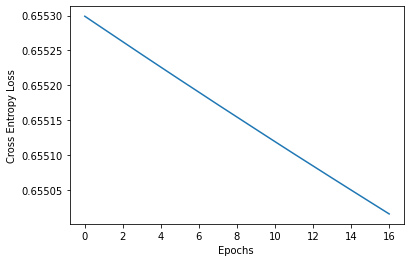

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epochs ')
plt.show()

In [ ]:
##Save Model

save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Assignment02.1.pkl') 


In [ ]:
##Load Model
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Assignment02.1.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


#**Settings #2**

*   **Batch Size = 1000**
*   **Number of iterations = 10000**
*   **Learning Rate = 0.001**






In [ ]:
# Hyperparameters
batch_size = 1000
num_iters = 10000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (n_samples / batch_size)
num_epochs = int(num_epochs)
num_epochs

324

In [ ]:
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learing_rate)

In [ ]:

iteration_loss = []
for epoch in range(num_epochs):
  
  y_predicted=model(x_train)
  loss=criterion(y_predicted,y_train)
  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%10==0:
    correct=0
    total=0
    
    y_predicted=model(x_test)
    y_predicted_cls=y_predicted.round()
    total+=y_test.size(0)
    correct += (y_predicted_cls == y_test).sum()
    accuracy = 100 * correct.item() / total
    
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch+1, loss.item(), accuracy))
    iteration_loss.append(loss.item())

Epoch: 10. Loss: 0.6549939513206482. Accuracy: 60.03892312682452
Epoch: 20. Loss: 0.6549727916717529. Accuracy: 60.03892312682452
Epoch: 30. Loss: 0.654951810836792. Accuracy: 60.03892312682452
Epoch: 40. Loss: 0.6549309492111206. Accuracy: 60.03892312682452
Epoch: 50. Loss: 0.6549102067947388. Accuracy: 60.07135906584496
Epoch: 60. Loss: 0.6548895835876465. Accuracy: 60.07135906584496
Epoch: 70. Loss: 0.6548690795898438. Accuracy: 60.13623094388583
Epoch: 80. Loss: 0.6548487544059753. Accuracy: 60.07135906584496
Epoch: 90. Loss: 0.6548283696174622. Accuracy: 60.07135906584496
Epoch: 100. Loss: 0.6548082828521729. Accuracy: 60.07135906584496
Epoch: 110. Loss: 0.6547882556915283. Accuracy: 60.07135906584496
Epoch: 120. Loss: 0.6547683477401733. Accuracy: 60.10379500486539
Epoch: 130. Loss: 0.6547485589981079. Accuracy: 60.10379500486539
Epoch: 140. Loss: 0.6547287702560425. Accuracy: 60.13623094388583
Epoch: 150. Loss: 0.6547091603279114. Accuracy: 60.10379500486539
Epoch: 160. Loss: 0.

[0.6549939513206482, 0.6549727916717529, 0.654951810836792, 0.6549309492111206, 0.6549102067947388, 0.6548895835876465, 0.6548690795898438, 0.6548487544059753, 0.6548283696174622, 0.6548082828521729, 0.6547882556915283, 0.6547683477401733, 0.6547485589981079, 0.6547287702560425, 0.6547091603279114, 0.6546897888183594, 0.6546703577041626, 0.6546511054039001, 0.654632031917572, 0.6546128988265991, 0.6545940041542053, 0.6545751094818115, 0.654556393623352, 0.6545377373695374, 0.6545191407203674, 0.6545007824897766, 0.6544824242591858, 0.6544641852378845, 0.654446005821228, 0.6544279456138611, 0.6544100046157837, 0.6543921828269958]


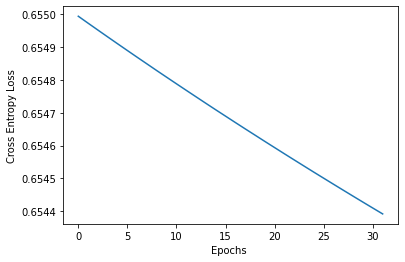

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epochs ')
plt.show()

In [ ]:
##Save Model

save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Assignment02.2.pkl') 


In [ ]:
##Load Model
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Assignment02.2.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


#**Settings #3**

*   **Batch Size = 1500**
*   **Number of iterations = 15000**
*   **Learning Rate = 0.0001**






In [ ]:
# Hyperparameters
batch_size = 1500
num_iters = 15000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (n_samples / batch_size)
num_epochs = int(num_epochs)
num_epochs

729

In [ ]:
learning_rate = 0.0001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learing_rate)

In [ ]:

iteration_loss = []
for epoch in range(num_epochs):
  
  y_predicted=model(x_train)
  #loss=criterion(y_predicted,y_train)
  loss=criterion(y_predicted,y_train)
  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 5 == 0:
    correct=0
    total=0
    
    y_predicted=model(x_test)
    y_predicted_cls=y_predicted.round()
    total+=y_test.size(0)
    correct += (y_predicted_cls == y_test).sum()
    accuracy = 100 * correct.item() / total
    
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch+1, loss.item(), accuracy))
    iteration_loss.append(loss.item())

Epoch: 5. Loss: 0.6543761491775513. Accuracy: 60.07135906584496
Epoch: 10. Loss: 0.6543673276901245. Accuracy: 60.07135906584496
Epoch: 15. Loss: 0.654358446598053. Accuracy: 60.03892312682452
Epoch: 20. Loss: 0.654349684715271. Accuracy: 60.03892312682452
Epoch: 25. Loss: 0.6543408632278442. Accuracy: 60.03892312682452
Epoch: 30. Loss: 0.6543320417404175. Accuracy: 60.10379500486539
Epoch: 35. Loss: 0.6543233394622803. Accuracy: 60.10379500486539
Epoch: 40. Loss: 0.6543146967887878. Accuracy: 60.10379500486539
Epoch: 45. Loss: 0.6543059349060059. Accuracy: 60.10379500486539
Epoch: 50. Loss: 0.6542972326278687. Accuracy: 60.10379500486539
Epoch: 55. Loss: 0.6542885899543762. Accuracy: 60.10379500486539
Epoch: 60. Loss: 0.654279887676239. Accuracy: 60.10379500486539
Epoch: 65. Loss: 0.6542713046073914. Accuracy: 60.10379500486539
Epoch: 70. Loss: 0.6542627811431885. Accuracy: 60.10379500486539
Epoch: 75. Loss: 0.654254138469696. Accuracy: 60.13623094388583
Epoch: 80. Loss: 0.65424561500

[0.6543761491775513, 0.6543673276901245, 0.654358446598053, 0.654349684715271, 0.6543408632278442, 0.6543320417404175, 0.6543233394622803, 0.6543146967887878, 0.6543059349060059, 0.6542972326278687, 0.6542885899543762, 0.654279887676239, 0.6542713046073914, 0.6542627811431885, 0.654254138469696, 0.6542456150054932, 0.6542370319366455, 0.6542285680770874, 0.6542201638221741, 0.6542116403579712, 0.6542032361030579, 0.6541948914527893, 0.6541864275932312, 0.6541780829429626, 0.6541696786880493, 0.6541613936424255, 0.6541529893875122, 0.6541447639465332, 0.6541364789009094, 0.6541281938552856, 0.6541199684143066, 0.6541117429733276, 0.6541035175323486, 0.6540953516960144, 0.654087245464325, 0.6540790796279907, 0.6540709733963013, 0.6540629267692566, 0.6540548205375671, 0.6540467143058777, 0.654038667678833, 0.6540306806564331, 0.6540226936340332, 0.6540147066116333, 0.6540067195892334, 0.6539987921714783, 0.6539908647537231, 0.653982937335968, 0.6539750695228577, 0.6539672613143921, 0.6539

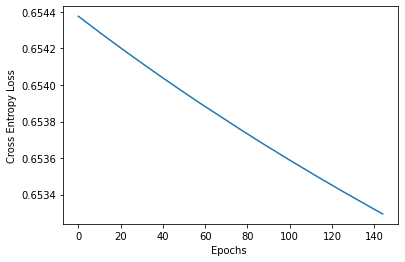

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epochs ')
plt.show()

In [ ]:
##Save Model

save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Assignment02.3.pkl') 


**Result Table:-**

| Settings #1      | Settings #2     | Settings #3     |
| :------------- | :----------: | -----------: |
|  Batch Size = 700 | Batch Size = 1000   | Batch Size = 1500    |
|  Number of iterations = 6000 | Number of iterations = 10000   | Number of iterations = 15000    |
|  Learning Rate = 0.001 | Learning Rate = 0.001   | Learning Rate = 0.0001 |
| Accuracy : 60.038  | Accuracy : 60.071 | Accuracy : 60.42 | |
